In [54]:
from time import sleep
from tqdm.notebook import tqdm

In [9]:
for i in range(10):
    print(i)
    sleep(1) #Something that takes a long time

0
1
2
3
4
5
6
7
8
9


In [10]:
for i in tqdm(range(10)):
    print(i)
    sleep(1) #Something that takes a long time

  0%|          | 0/10 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9


In [19]:
factorial = 1
for i in tqdm(range(1,1000000)):
    factorial *= i

  0%|          | 0/999999 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [68]:
factorial = 1
for i in tqdm(range(1,1000000)):
    factorial *= i

  0%|          | 0/999999 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from matplotlib.ticker import Formatter
from datetime import timedelta

In [73]:
xs = np.array([0, 141566, 189230,  407422, 630128 ])
ys = np.array([0, 0*60+6, 0*60+13, 1*60+1, 4*60+18])
#fig, axes = plt.subplots(1, figsize=(4,2))
#axes.scatter(xs, ys, s=5, c="k");

R² = 0.9999291194455168
Y = 5.40455788132747 * e^(--6.168878458155946e-06 * x) + -5.607536881046796
Tau = -810520.1024652126 µs
Time for x=999999: 0:42:55.864156


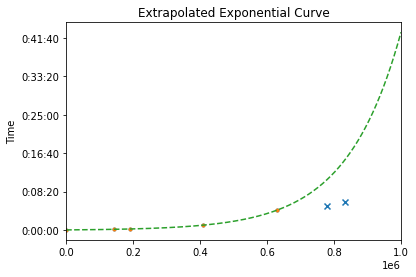

In [74]:
# Note: This is an exponential fit

class TimeFormatter(Formatter):
    def __call__(self, x, pos=0):
        """Return the label for time x at position pos."""
        return timedelta(seconds=x)



xlim = (0,1000000)

plt.plot(xs, ys, '.')
plt.title("Original Data")

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
p0 = (100, 0.00000001, 10) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 200_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
#plt.plot(xs, ys, '.', label="data")
#plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
#plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")

xs2 = np.arange(*xlim)
ys2 = monoExp(xs2, m, t, b)

plt.plot(xs, ys, '.', label="data")
plt.plot(xs2, ys2, '--', label="fitted")
plt.title("Extrapolated Exponential Curve")
plt.ylabel("Time")

plt.xlim(xlim)

plt.gca().yaxis.set_major_formatter(TimeFormatter())

print(f"Time for x={xs2[-1]}: {TimeFormatter()(ys2[-1])}")



plt.scatter([778626, 833232],[5*60+9, 6*60+9], marker="x"); #Samples done at another time; were faster for earlier iterations too.